# New York City Rental Market Analysis & Visualization

## Data Source

The dataset 'rental' is extracted from rental website, it is a daily screenshot of New York City rental market. I will utilize this dataset to visualize and construct models so as to deliver a comprehensive view for newyorkers who is struggling to find their next apartment.

The dataset contains three main boroughs of New York City (exclude Staten Island and Bronx) and their submarkets as well as neighborhoods, displayed by categorical variables. Descriptive numerical metrics are used to show detailed apartment information. Variable 'rent' is dependent variable that will be predicted in models.

## Datasets

### 1. rental (loading from data source)

1. rental_id: the id of apartment unit
2. building_id: the id of apartment building
3. rent: the rent of apartment
4. bedrooms: bedroom amount
5. bathrooms: bathrooms amount
6. size_sqft: apartment size
7. min_to_subway: apartment to nearest subway stop walking time
8. floor: the floor of apartment
9. building_age_years: apartment building history
10. no_fees: free amenity fee or not
11. has_roofdeck: has roof-deck or not
12. has_wahser_dryer: has washer + dryer or not
13. has_doorman: has doorman or not
14. has_elevator: has elevator or not
15. has_dishwasher: has dishwasher or not
16. has_patio: has patio or not
17. has_gym: has gym or not
18. neighborhood: third-level region
19. submarket: second-level region
20. borough: first-level region

For dummy variables (10-17): 1 == YES, 0 == NO.

### 2. rentalnew

Based on dataset 'rental', adding 2 new features: latitude and longitude that generated using Geopy, making geographical visualization more practical.

### 3. df

Based on dataset 'rentalnew', calculating rental listing value counts within each neighborhood and average statistical information for metrics: rent, size_sqft and building_age.

### 4.re

Based on dataset'rental', normalizing feature 'bedrooms'.

## Inspiration

This notebook showcases the relationship among multiple features, the factors that impacting rental price, the trend within locational, numerical and categorical variables. By wrangling, visualizing and fully understanding the dataset, predictive modeling for rental price will be deployed in another notebook: New York City Rental Market Predictive Modeling.

Besides exploring and analyzing the dataset, common questions will be answered to consummate
data storytelling part. 

Q1. What is the median and rental price range in each borough ?                                                        
Q2. Which submarket and neighborhood do people choose to live ?                                                        
Q3. Do amenity fee, W/D, doorman and elevator really affect rental price regionally ?                                  
Q4. Do amenity fee, W/D, doorman and elevator have the same impact on rental price no matter what kind of unit it is ?  
Q5. Which submarket has the most available apartments ?                                                                
Q6. Given a budget, where is the largest apartment located ?                                                            
Q7. Given a unit, which is the cheapest apartment ?                                                                       
Q8. Given a budget, which apartment has the best view ?                                                                
Q9. Given a budget, which apartment has the most convenient transportation ?                                            
Q10. Under the same unit, which submarket has the cheapest apartment ?                                                  
Q11. Given a budget, what is the most ideal combination of bedroom and bathroom ?                                       
Q12. Geographically speaking, which area has the cheapest or most expensive apartments ?                                   
Q13. Which neighborhood has the highest average rent overall ?                                                          
Q14. Which are the top 5 neighborhoods with the most available apartments ?                                            
Q15. Which neighborhood has the largest apartment overall ?                                                            
Q16. Which neighborhood has the newest apartment overall ?

In [1]:
# -------------------------- Main Libraries ------------------------- #
import pandas as pd
import numpy as np
import time
from functools import reduce
from urllib.request import urlopen

# ----------------------- Basic Visualization ----------------------- #
import matplotlib.pyplot as plt
from palettable.colorbrewer.qualitative import Pastel1_7
from matplotlib import rc
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 
plt.style.use('ggplot')
import plotly as plotly               
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)

# --------------------------- Word Cloud --------------------------- #
from PIL import Image
from wordcloud import WordCloud 

# -------------------- Geographical Preprocess --------------------- #
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter            
import geopandas as gpd  

# ------------------ Geographical Visualization -------------------- #
import folium
from folium import plugins

# ---------------- Data Cleaning ---------------

## Load Dataset

In [2]:
rental=pd.read_csv('/Users/stevenli/Desktop/rental.csv')

In [3]:
rental.head()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
0,1545,44518357,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,All Upper East Side,Manhattan
1,2472,94441623,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,All Downtown,Manhattan
2,10234,87632265,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Astoria,Northwest Queens,Queens
3,2919,76909719,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,All Midtown,Manhattan
4,2790,92953520,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,All Downtown,Manhattan


In [4]:
rental.dtypes

rental_id             int64
building_id           int64
rent                  int64
bedrooms            float64
bathrooms             int64
size_sqft             int64
min_to_subway         int64
floor               float64
building_age_yrs      int64
no_fee                int64
has_roofdeck          int64
has_washer_dryer      int64
has_doorman           int64
has_elevator          int64
has_dishwasher        int64
has_patio             int64
has_gym               int64
neighborhood         object
submarket            object
borough              object
dtype: object

The dataset contains 20 columns and 5000 rows.

## Check Missing Values

In [5]:
rental.isnull().sum()

rental_id           0
building_id         0
rent                0
bedrooms            0
bathrooms           0
size_sqft           0
min_to_subway       0
floor               0
building_age_yrs    0
no_fee              0
has_roofdeck        0
has_washer_dryer    0
has_doorman         0
has_elevator        0
has_dishwasher      0
has_patio           0
has_gym             0
neighborhood        0
submarket           0
borough             0
dtype: int64

## Check Outliers 

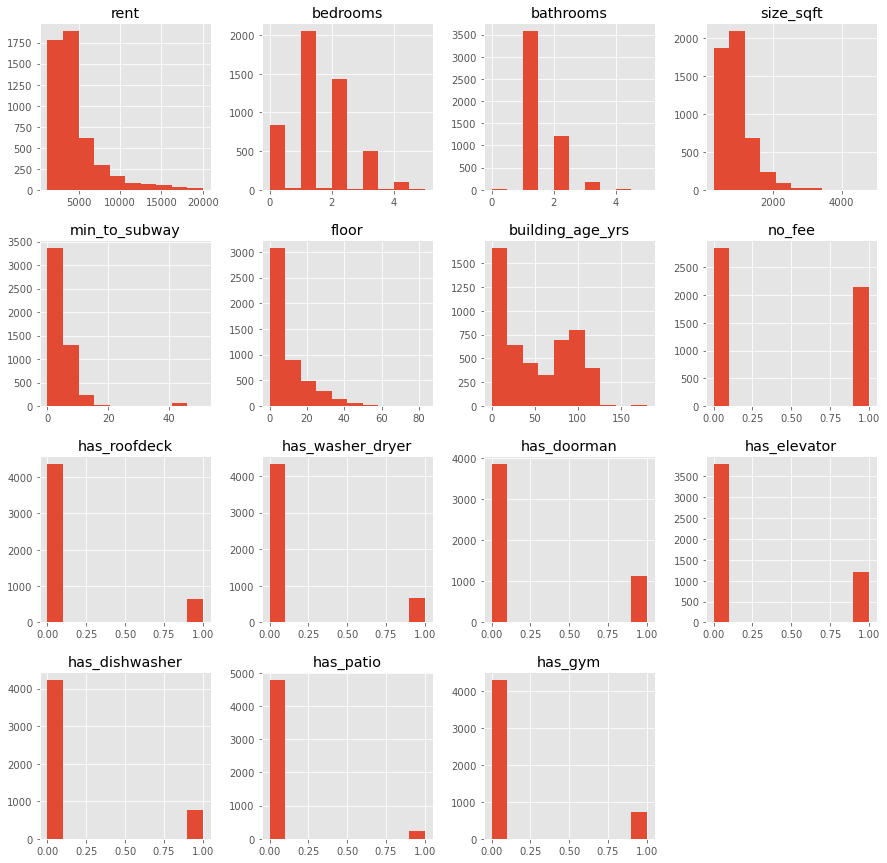

In [9]:
r = rental.hist(figsize = (15,15))

Text(0, 0.5, 'Bathrooms')

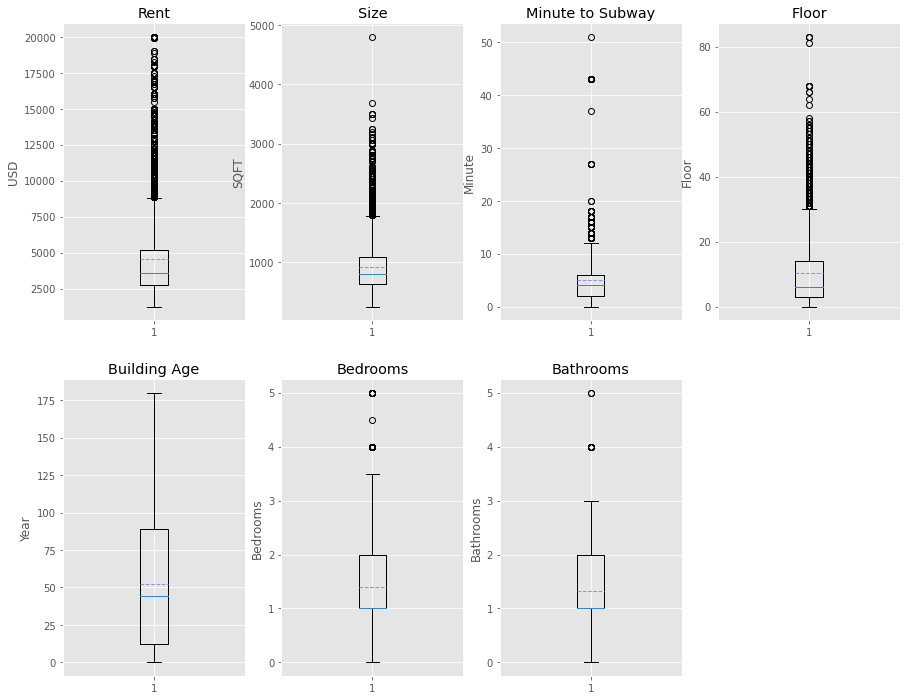

In [68]:
#numerical
plt.figure(figsize=[15,12])

plt.subplot(241)
plt.boxplot(rental['rent'], showmeans = True, meanline = True)
plt.title('Rent')
plt.ylabel('USD')

plt.subplot(242)
plt.boxplot(rental['size_sqft'], showmeans = True, meanline = True)
plt.title('Size')
plt.ylabel('SQFT')

plt.subplot(243)
plt.boxplot(rental['min_to_subway'], showmeans = True, meanline = True)
plt.title('Minute to Subway')
plt.ylabel('Minute')

plt.subplot(244)
plt.boxplot(rental['floor'], showmeans = True, meanline = True)
plt.title('Floor')
plt.ylabel('Floor')

plt.subplot(245)
plt.boxplot(rental['building_age_yrs'], showmeans = True, meanline = True)
plt.title('Building Age')
plt.ylabel('Year')

plt.subplot(246)
plt.boxplot(rental['bedrooms'], showmeans = True, meanline = True)
plt.title('Bedrooms')
plt.ylabel('Bedrooms')

plt.subplot(247)
plt.boxplot(rental['bathrooms'], showmeans = True, meanline = True)
plt.title('Bathrooms')
plt.ylabel('Bathrooms')

<AxesSubplot:ylabel='has_gym'>

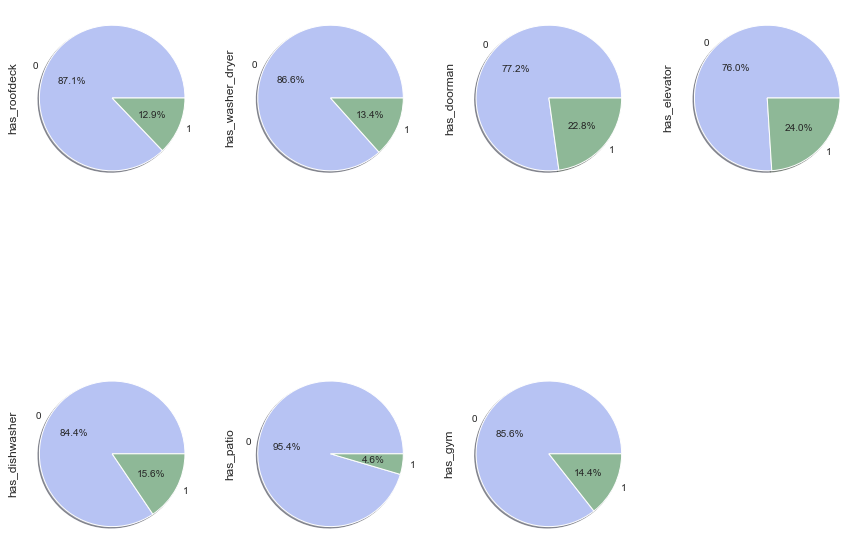

In [90]:
plt.style.use('seaborn-white')
plt.figure(figsize=[15,12])

colors = ['#B7C3F3','#8EB897']

plt.subplot(241)
rental['has_roofdeck'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, 
                                               wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=colors)

plt.subplot(242)
rental['has_washer_dryer'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, 
                                               wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=colors)

plt.subplot(243)
rental['has_doorman'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, 
                                               wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=colors)

plt.subplot(244)
rental['has_elevator'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, 
                                               wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=colors)

plt.subplot(245)
rental['has_dishwasher'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, 
                                               wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=colors)

plt.subplot(246)
rental['has_patio'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, 
                                               wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=colors)

plt.subplot(247)
rental['has_gym'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, 
                                               wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=colors)

Given above visualization and market sense, there is no outlier within above features.

/Users/stevenli/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Rent')

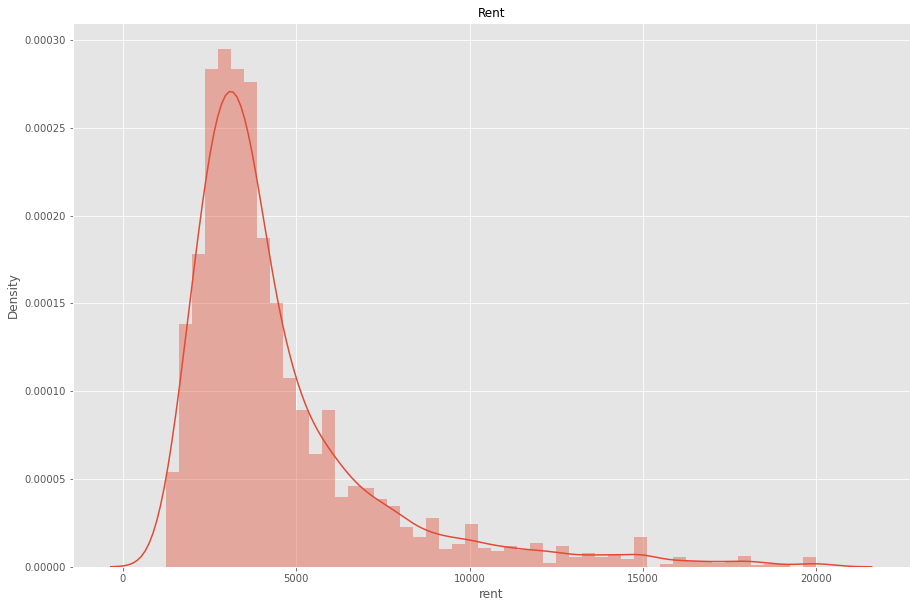

In [28]:
plt.figure(figsize=(15,10))
ax = sns.distplot(rental['rent'], kde=True)
ax.set_title('Rent', fontsize=12)

The density plot shows that feature 'rent' has normal distribution with positive skewness, which means there is an ascending order: mode < median < mean. Alternatively, most apartments in NYC has a monthly rent from 1800 to 5000 USD, whereas the extraordinarily high rent ( <= 18000 ) is unusually to observe.

## Categorical Variable

### Check Unusual Value

In [6]:
rental['borough'].value_counts()

Manhattan    3539
Brooklyn     1013
Queens        448
Name: borough, dtype: int64

In [7]:
rental['submarket'].value_counts()

All Downtown           1229
All Midtown            1001
All Upper West Side     579
All Upper East Side     505
North Brooklyn          347
Northwest Brooklyn      311
Northwest Queens        265
All Upper Manhattan     221
East Brooklyn           155
Central Queens          121
South Brooklyn          119
Prospect Park            81
Northeast Queens         52
South Queens             13
The Rockaways             1
Name: submarket, dtype: int64

In [8]:
rental['neighborhood'].value_counts()

Upper West Side    579
Upper East Side    500
Midtown East       460
Midtown West       314
Williamsburg       306
                  ... 
North Corona         1
Jamaica Hills        1
Corona               1
Glendale             1
Rockaway All         1
Name: neighborhood, Length: 93, dtype: int64

In [9]:
for borough in rental.borough.unique():
    submarket = rental.submarket[rental.borough == borough].unique()
    print("{} has {} submarkets: {}...\n".format(
        borough, 
        len(submarket), 
        submarket[:6]
    ))

Manhattan has 6 submarkets: ['All Upper East Side' 'All Downtown' 'All Midtown' 'All Upper Manhattan'
 'All Upper West Side' 'Northwest Queens']...

Queens has 5 submarkets: ['Northwest Queens' 'Central Queens' 'Northeast Queens' 'South Queens'
 'The Rockaways']...

Brooklyn has 5 submarkets: ['North Brooklyn' 'South Brooklyn' 'Northwest Brooklyn' 'Prospect Park'
 'East Brooklyn']...



'Northwest Queens' has been wrongly allocated into Manhattan Neighborhood Group.

In [10]:
rental.loc[rental['submarket'] == 'Northwest Queens', 'borough'] = 'Queens'
rental

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
0,1545,44518357,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,All Upper East Side,Manhattan
1,2472,94441623,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,All Downtown,Manhattan
2,10234,87632265,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Astoria,Northwest Queens,Queens
3,2919,76909719,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,All Midtown,Manhattan
4,2790,92953520,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,All Downtown,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1964,73060494,2650,1.0,1,686,9,4.0,3,1,0,0,0,0,0,0,0,Astoria,Northwest Queens,Queens
4996,5686,92994390,6675,2.0,2,988,5,10.0,9,1,1,1,1,1,1,0,1,Tribeca,All Downtown,Manhattan
4997,9679,7689663,1699,0.0,1,250,2,5.0,96,0,0,0,0,0,0,0,0,Little Italy,All Downtown,Manhattan
4998,5188,62828354,3475,1.0,1,651,6,5.0,14,1,0,1,1,1,1,0,1,Midtown West,All Midtown,Manhattan


In [11]:
for borough in rental.borough.unique():
    submarket = rental.submarket[rental.borough == borough].unique()
    print("{} has {} submarkets: {}...\n".format(
        borough, 
        len(submarket), 
        submarket
    ))

Manhattan has 5 submarkets: ['All Upper East Side' 'All Downtown' 'All Midtown' 'All Upper Manhattan'
 'All Upper West Side']...

Queens has 5 submarkets: ['Northwest Queens' 'Central Queens' 'Northeast Queens' 'South Queens'
 'The Rockaways']...

Brooklyn has 5 submarkets: ['North Brooklyn' 'South Brooklyn' 'Northwest Brooklyn' 'Prospect Park'
 'East Brooklyn']...



In [12]:
for submarket in rental.submarket.unique():
    neighborhood = rental.neighborhood[rental.submarket == submarket].unique()
    print("{} has {} neighborhoods: {}...\n".format(
        submarket, 
        len(neighborhood), 
        neighborhood
    ))

All Upper East Side has 2 neighborhoods: ['Upper East Side' 'Roosevelt Island']...

All Downtown has 15 neighborhoods: ['Greenwich Village' 'Soho' 'Battery Park City' 'Flatiron' 'East Village'
 'Lower East Side' 'Tribeca' 'Gramercy Park' 'West Village' 'Chelsea'
 'Financial District' 'Chinatown' 'Stuyvesant Town/PCV' 'Little Italy'
 'Nolita']...

Northwest Queens has 3 neighborhoods: ['Astoria' 'Long Island City' 'Sunnyside']...

All Midtown has 5 neighborhoods: ['Midtown' 'Midtown East' 'Midtown West' 'Central Park South'
 'Midtown South']...

North Brooklyn has 2 neighborhoods: ['Williamsburg' 'Greenpoint']...

Central Queens has 9 neighborhoods: ['Forest Hills' 'Rego Park' 'Jackson Heights' 'Elmhurst' 'Corona'
 'Ridgewood' 'Woodside' 'Glendale' 'North Corona']...

All Upper Manhattan has 8 neighborhoods: ['Central Harlem' 'East Harlem' 'Inwood' 'Washington Heights'
 'Hamilton Heights' 'Morningside Heights' 'West Harlem' 'Manhattanville']...

South Brooklyn has 15 neighborhoods: ['Gr

# ---------------- Data Visualization ----------------

## Statistical Distribution on Rent in Each Borough

### Q1: What is the median and rental price range in each borough ?

Violin plots display the median, interquartile range and possible outliers together, from the below plot, Manhattan has highest rent median (around 4000), followed by Brooklyn and Queens. The density, or saying, rent distribution, has a wider range among all other boroughs, meaning the rent range is pretty flexible. Though observations that fall outside the lower/upper adjacent values (the black line within the plot) used to be considered as outliers, but given market statistics, rent price of NYC does contain 'suspicious' values such as 20000.

<ipython-input-282-14057c9b9d5b>:10: UserWarning:

FixedFormatter should only be used together with FixedLocator



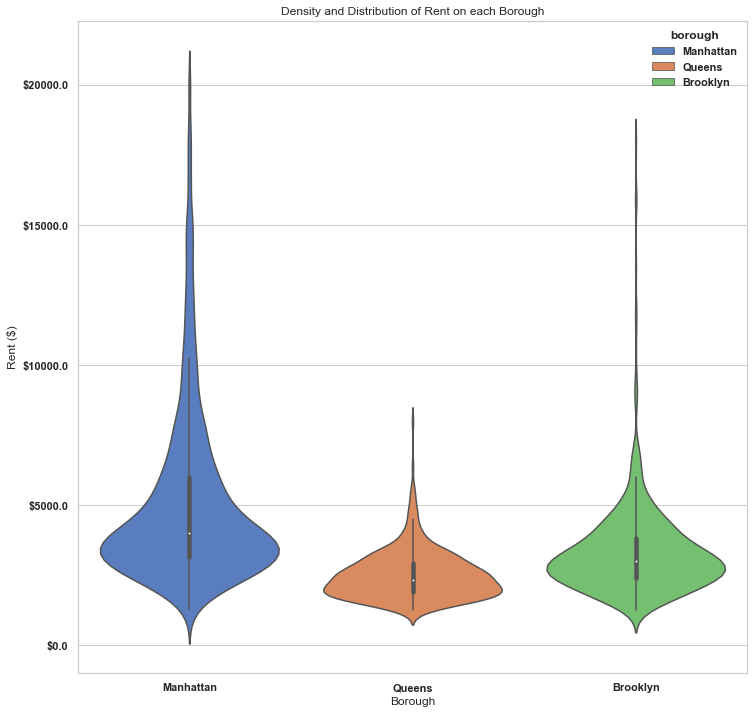

In [282]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 12))
vio = sns.violinplot(ax=ax, x="borough", y="rent", 
                                          hue="borough", data=rental, 
                                          palette="muted", dodge=False)
vio.set(xlabel='Borough', ylabel='Rent ($)', 
                             title='Density and Distribution of Rent on each Borough')
ylabels = ['${}'.format(x) for x in vio.get_yticks()]
vio.set_yticklabels(ylabels)
plt.show()

## Statistical Distribution on Rent in Each Submarket

<ipython-input-285-d5fa20cf4a00>:9: UserWarning:

FixedFormatter should only be used together with FixedLocator



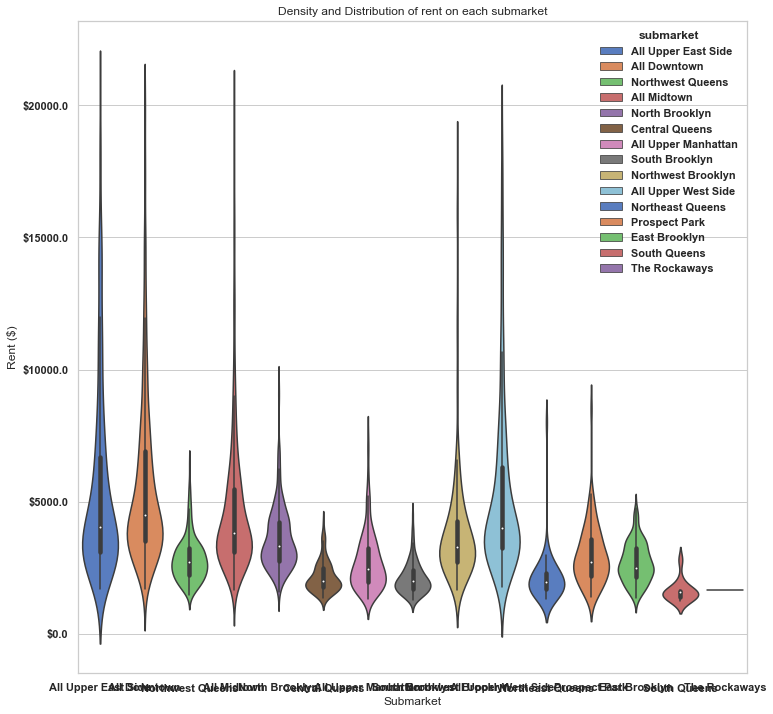

In [285]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 12))
vio2 = sns.violinplot(ax=ax, x="submarket", y="rent", 
                                          hue="submarket", data=rental, 
                                          palette="muted", dodge=False)
vio2.set(xlabel='Submarket', ylabel='Rent ($)', 
                             title='Density and Distribution of rent on each submarket')
ylabels = ['${}'.format(x) for x in vio2.get_yticks()]
vio2.set_yticklabels(ylabels)
plt.show()

## Word Cloud on Submarket 

### Q2: Which submarket and neighborhood do people choose to live ?

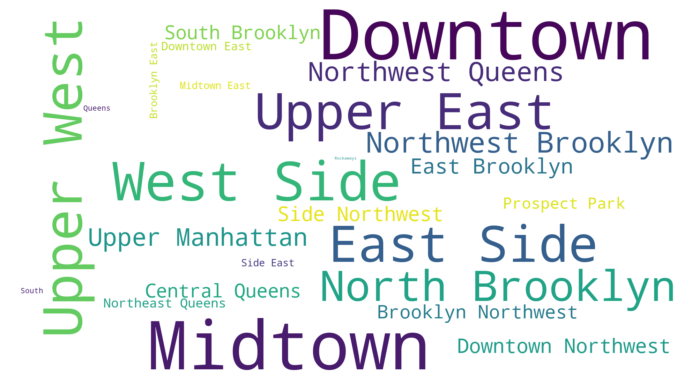

In [39]:
submarket_text = " ".join([submarket for submarket in rental["submarket"]])
wordcloud = WordCloud(background_color="white",width=1920, height=1080,max_font_size=200, max_words=200).generate(submarket_text)
f, ax = plt.subplots(figsize=(12, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Word Cloud on Neighborhood 

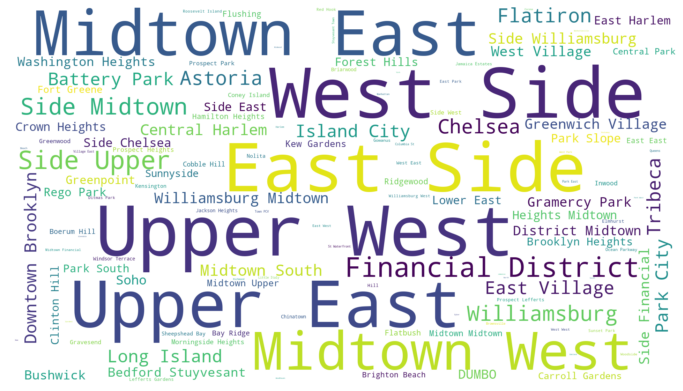

In [40]:
neighborhood_text = " ".join([neighborhood for neighborhood in rental["neighborhood"]])
wordcloud = WordCloud(background_color="white",width=1920, height=1080,max_font_size=200, max_words=200).generate(neighborhood_text)
f, ax = plt.subplots(figsize=(12, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Normalization on Bedrooms - Create Dataset 're'

There are attributes in feature 'bedrooms' ending with '.5', based on corresponding floor-plans, those '.5's are not outliers, but represents alcove units (e.g., alcove studio) or den/study room (e.g., 1bed1bath with den), so I will remove decimals, only including integers.

In [138]:
rentalnew['bedrooms'].value_counts()

1.0    2048
2.0    1438
0.0     832
3.0     496
4.0     103
1.5      28
0.5      26
2.5      15
5.0       8
3.5       5
4.5       1
Name: bedrooms, dtype: int64

In [268]:
re=rentalnew

In [143]:
re.loc[re['bedrooms'] == 0.5, 'bedrooms'] = 0

In [144]:
re.loc[re['bedrooms'] == 1.5, 'bedrooms'] = 1

In [145]:
re.loc[re['bedrooms'] == 2.5, 'bedrooms'] = 2

In [146]:
re.loc[re['bedrooms'] == 3.5, 'bedrooms'] = 3

In [147]:
re.loc[re['bedrooms'] == 4.5, 'bedrooms'] = 4

In [270]:
re['bedrooms'].value_counts()

1.0    2076
2.0    1453
0.0     858
3.0     501
4.0     104
5.0       8
Name: bedrooms, dtype: int64

## Dummy Variables on Rent with Each Bedroom Type and Borough

### Q3: Do amenity fee, W/D, doorman and elevator really affect rental price regionally ?
### Q4: Do amenity fee, W/D, doorman and elevator have the same impact on rental price no matter what kind of unit it is ?

<Figure size 720x720 with 0 Axes>

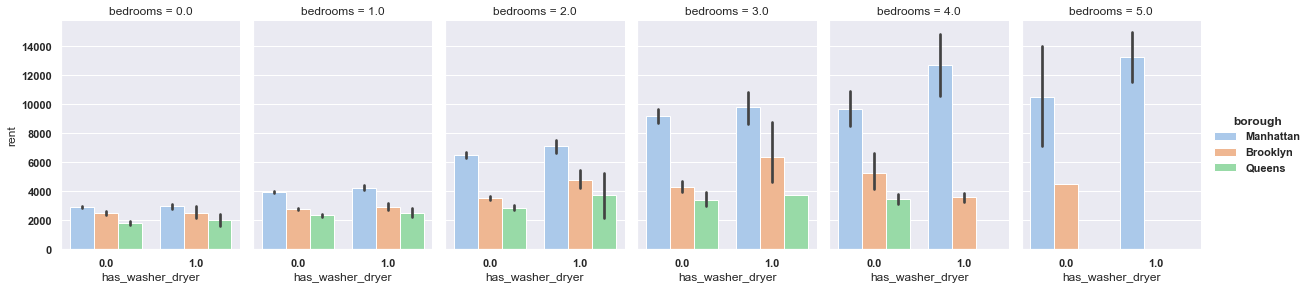

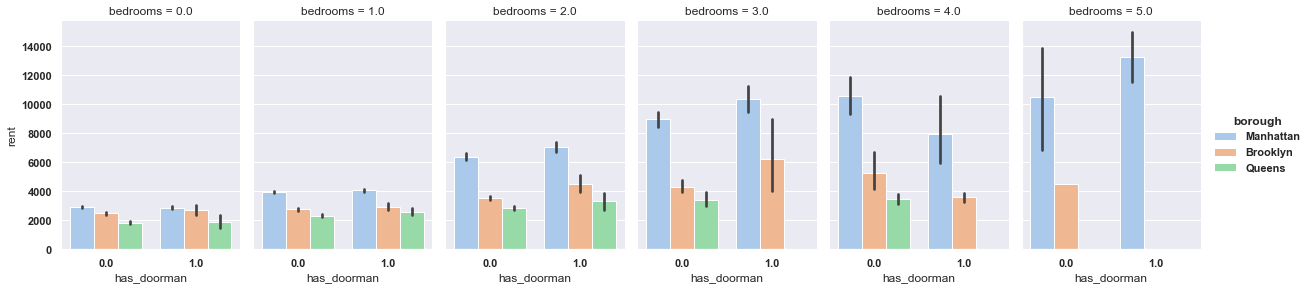

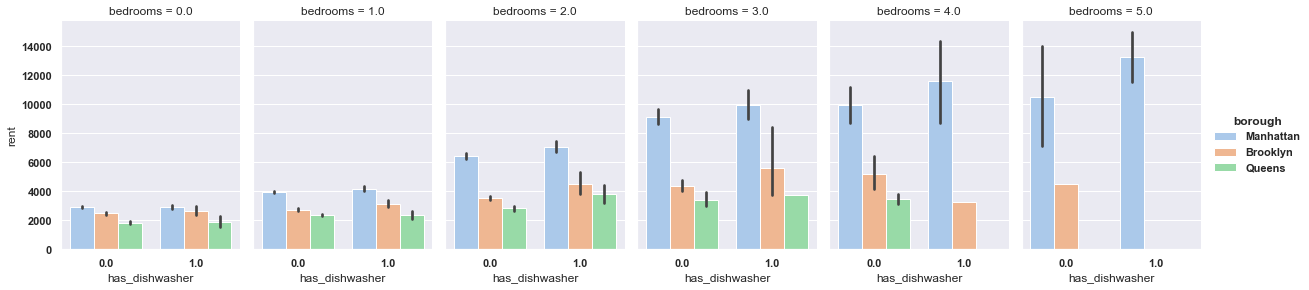

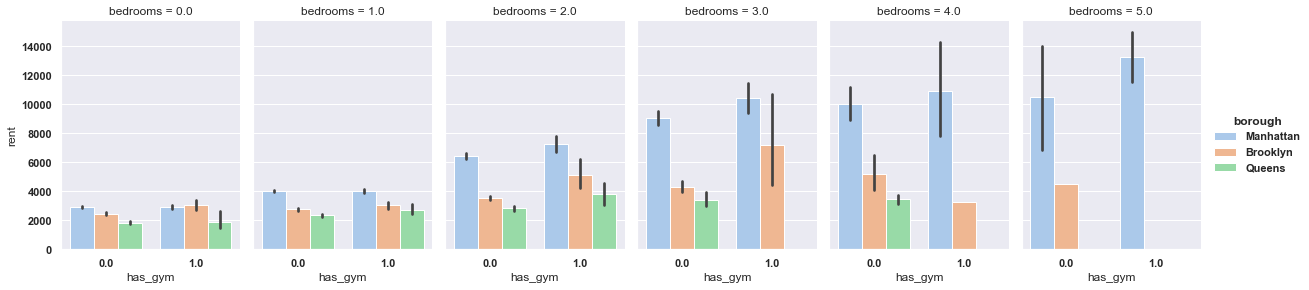

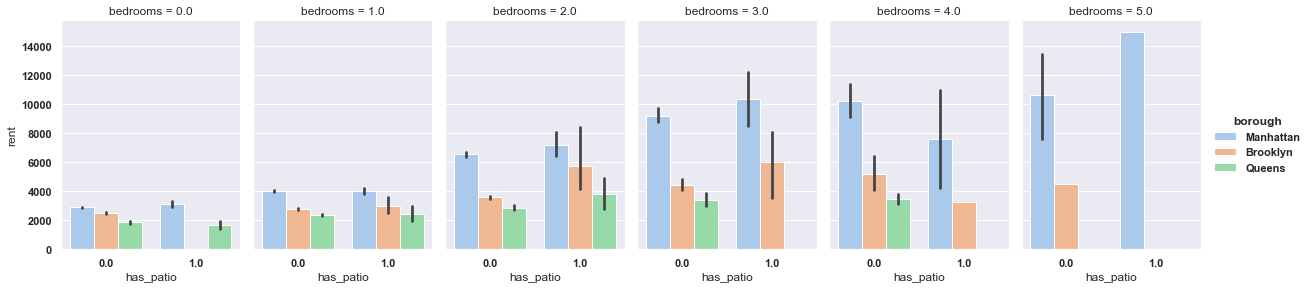

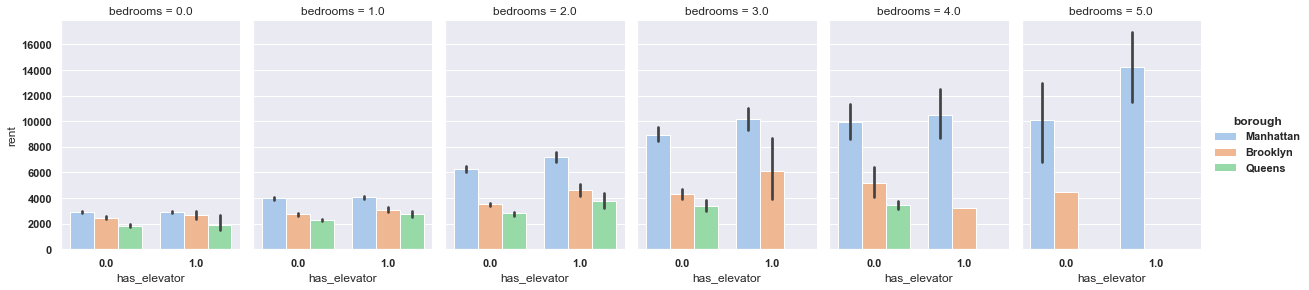

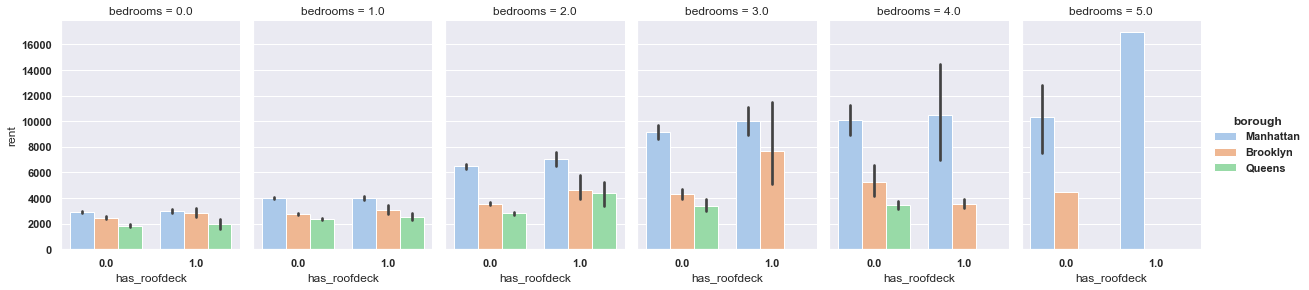

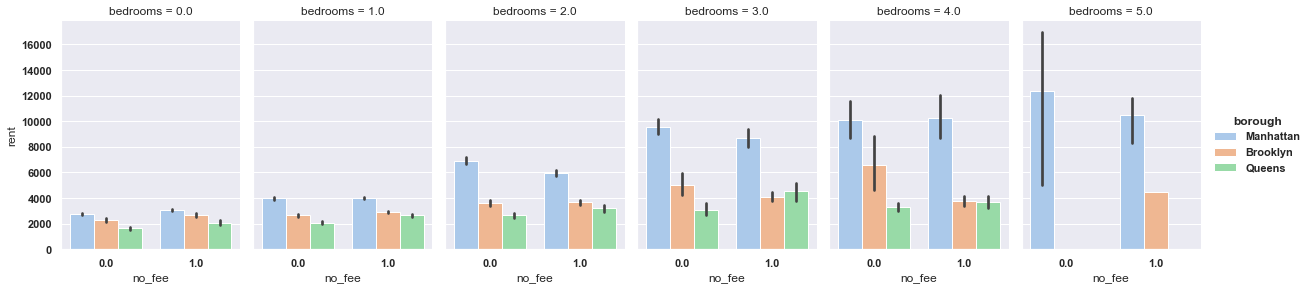

In [172]:
sns.set_palette(sns.color_palette("pastel"))
plt.figure(figsize=(10, 10))

plt.subplot
sns.catplot(x="has_washer_dryer", y="rent",
                 hue="borough", col="bedrooms",
                 data=re, kind="bar",
                 height=4, aspect=.7);
plt.subplot
sns.catplot(x="has_doorman", y="rent",
                 hue="borough", col="bedrooms",
                 data=re, kind="bar",
                 height=4, aspect=.7);
plt.subplot
sns.catplot(x="has_dishwasher", y="rent",
                 hue="borough", col="bedrooms",
                 data=re, kind="bar",
                 height=4, aspect=.7);
plt.subplot
sns.catplot(x="has_gym", y="rent",
                 hue="borough", col="bedrooms",
                 data=re, kind="bar",
                 height=4, aspect=.7);
plt.subplot
sns.catplot(x="has_patio", y="rent",
                 hue="borough", col="bedrooms",
                 data=re, kind="bar",
                 height=4, aspect=.7);
plt.subplot
sns.catplot(x="has_elevator", y="rent",
                 hue="borough", col="bedrooms",
                 data=re, kind="bar",
                 height=4, aspect=.7);
plt.subplot
sns.catplot(x="has_roofdeck", y="rent",
                 hue="borough", col="bedrooms",
                 data=re, kind="bar",
                 height=4, aspect=.7);
plt.subplot
sns.catplot(x="no_fee", y="rent",
                 hue="borough", col="bedrooms",
                 data=re, kind="bar",
                 height=4, aspect=.7);

For most dummy features, suppose in same unit and same borough, 'yes' is always more expensive than 'no'. With bedroom number increasing, when borough and dummy feature are fixed, the difference between rent showing a correspondingly high disparity. But for nearly all dummy features, when bedrooms = 4, there is a clear disparity that shows quite a different trend: 'yes' might have a cheaper price than 'no'. It might due to the lack of observations when bedrooms=4 or the specialty for a specific apartment building or area. But all in all, the dummy variables have little or no influences on rent for small units such as studio, but for larger units (>=3b), those factors should be considered if one has limited budget.

## Apartment Availability Percentage in Each Borough, Submarket

### Q5: Which submarket has the most available apartments ?

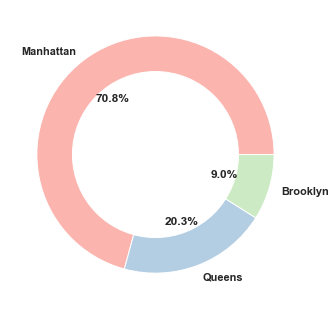

In [252]:
plt.figure(figsize=[15,12])
my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.subplot(221)
size = rental['borough'].value_counts()
plt.pie(size, labels=rental['borough'].unique(), autopct='%1.1f%%', colors=Pastel1_7.hex_colors)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

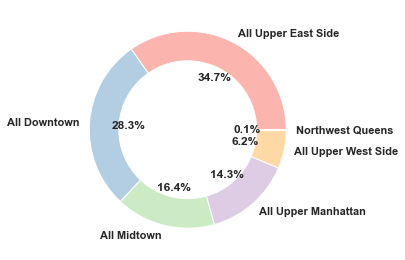

In [253]:
plt.figure(figsize=[15,12])
my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.subplot(131)
size = rental.submarket[rental.borough == 'Manhattan'].value_counts()
plt.pie(size, labels=rental.submarket[rental.borough == 'Manhattan'].unique(), autopct='%1.1f%%', colors=Pastel1_7.hex_colors)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

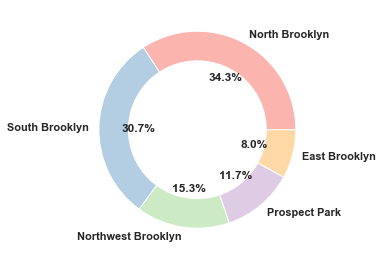

In [254]:
plt.figure(figsize=[15,12])
my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.subplot(132)
size = rental.submarket[rental.borough == 'Brooklyn'].value_counts()
plt.pie(size, labels=rental.submarket[rental.borough == 'Brooklyn'].unique(), autopct='%1.1f%%', colors=Pastel1_7.hex_colors)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

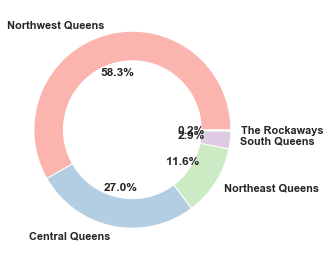

In [255]:
plt.figure(figsize=[15,12])
my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.subplot(133)
size = rental.submarket[rental.borough == 'Queens'].value_counts()
plt.pie(size, labels=rental.submarket[rental.borough == 'Queens'].unique(), autopct='%1.1f%%', colors=Pastel1_7.hex_colors)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

# -------------- Multivariate Analysis ---------------

## Size and Rent Analysis based on Borough

### Q6: Given a budget, where is the largest apartment located ?

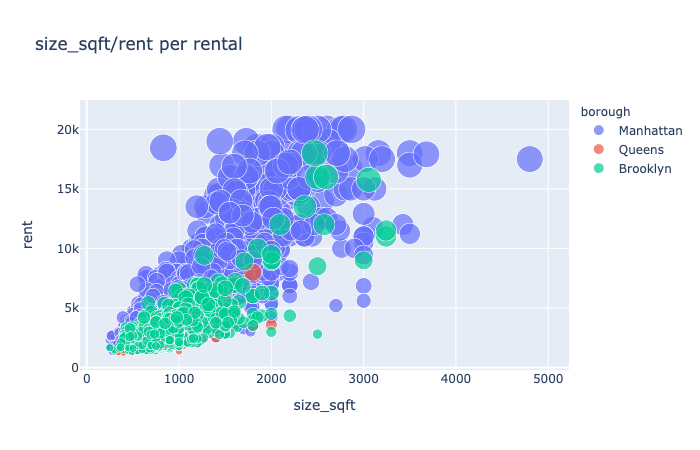

In [14]:
df = px.data.gapminder()
fig = px.scatter(rental, x="size_sqft", y="rent",
	         size="rent", color="borough",
                 hover_name="min_to_subway", title="size_sqft/rent per rental", size_max=20)
fig.show('png')

## Bedroom and Rent Analysis based on Borough and Size

### Q7: Given a unit, which is the cheapest apartment ?

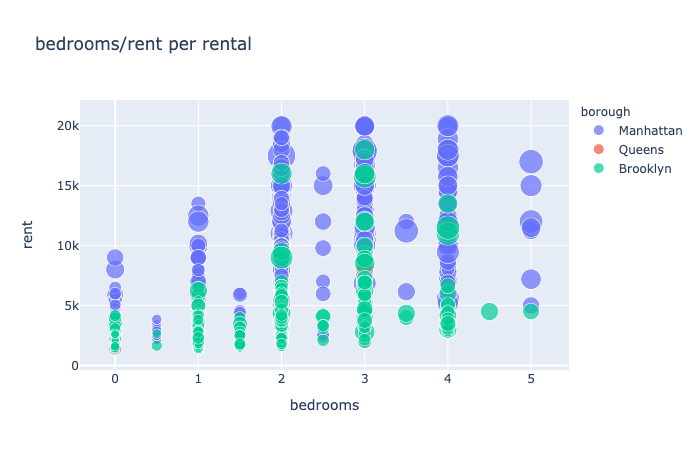

In [15]:
df = px.data.gapminder()

fig = px.scatter(rental, x="bedrooms", y="rent",
	         size="size_sqft", color="borough",
                 hover_name="min_to_subway", title="bedrooms/rent per rental", size_max=20)
fig.show('png')

## Floor and Rent Analysis based on Borough and Size

### Q8: Given a budget, which apartment has the best view ?

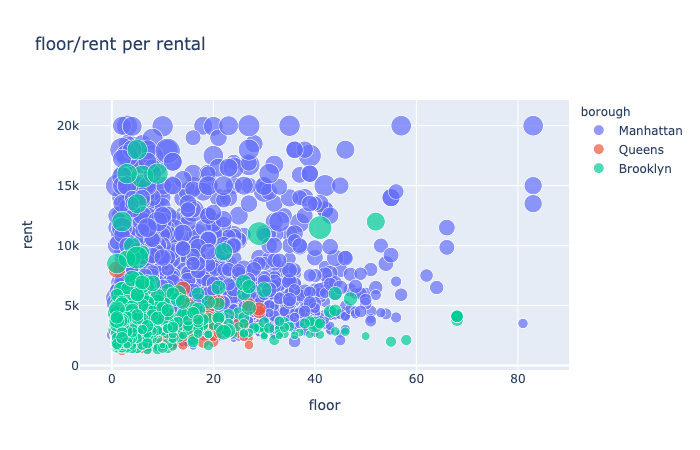

In [16]:
df = px.data.gapminder()

fig = px.scatter(rental, x="floor", y="rent",
	         size="size_sqft", color="borough",
                 hover_name="min_to_subway", title="floor/rent per rental", size_max=20)
fig.show('png')

## Transportation and Rent Analysis based on Borough

### Q9: Given a budget, which apartment has the most convenient transportation ?

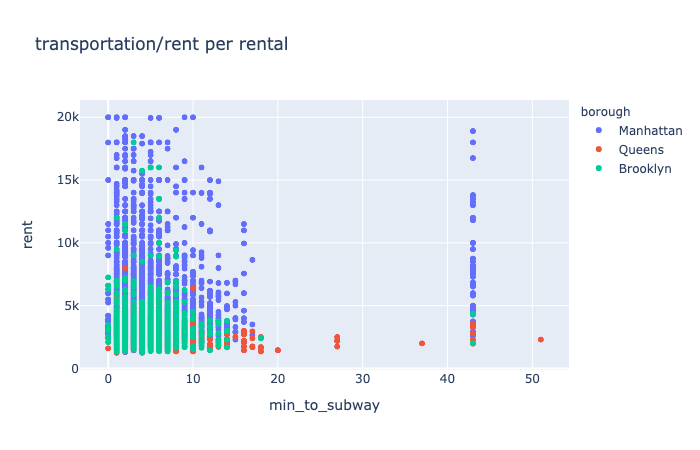

In [17]:
df = px.data.gapminder()

fig = px.scatter(rental, x="min_to_subway", y="rent"
	         , color="borough",
                 hover_name="floor", title="transportation/rent per rental", size_max=20)
fig.show('png')

## Bedroom and Rent Trend Analysis on Each Submarket

### Q10: Under the same unit, which submarket has the cheapest apartment ?

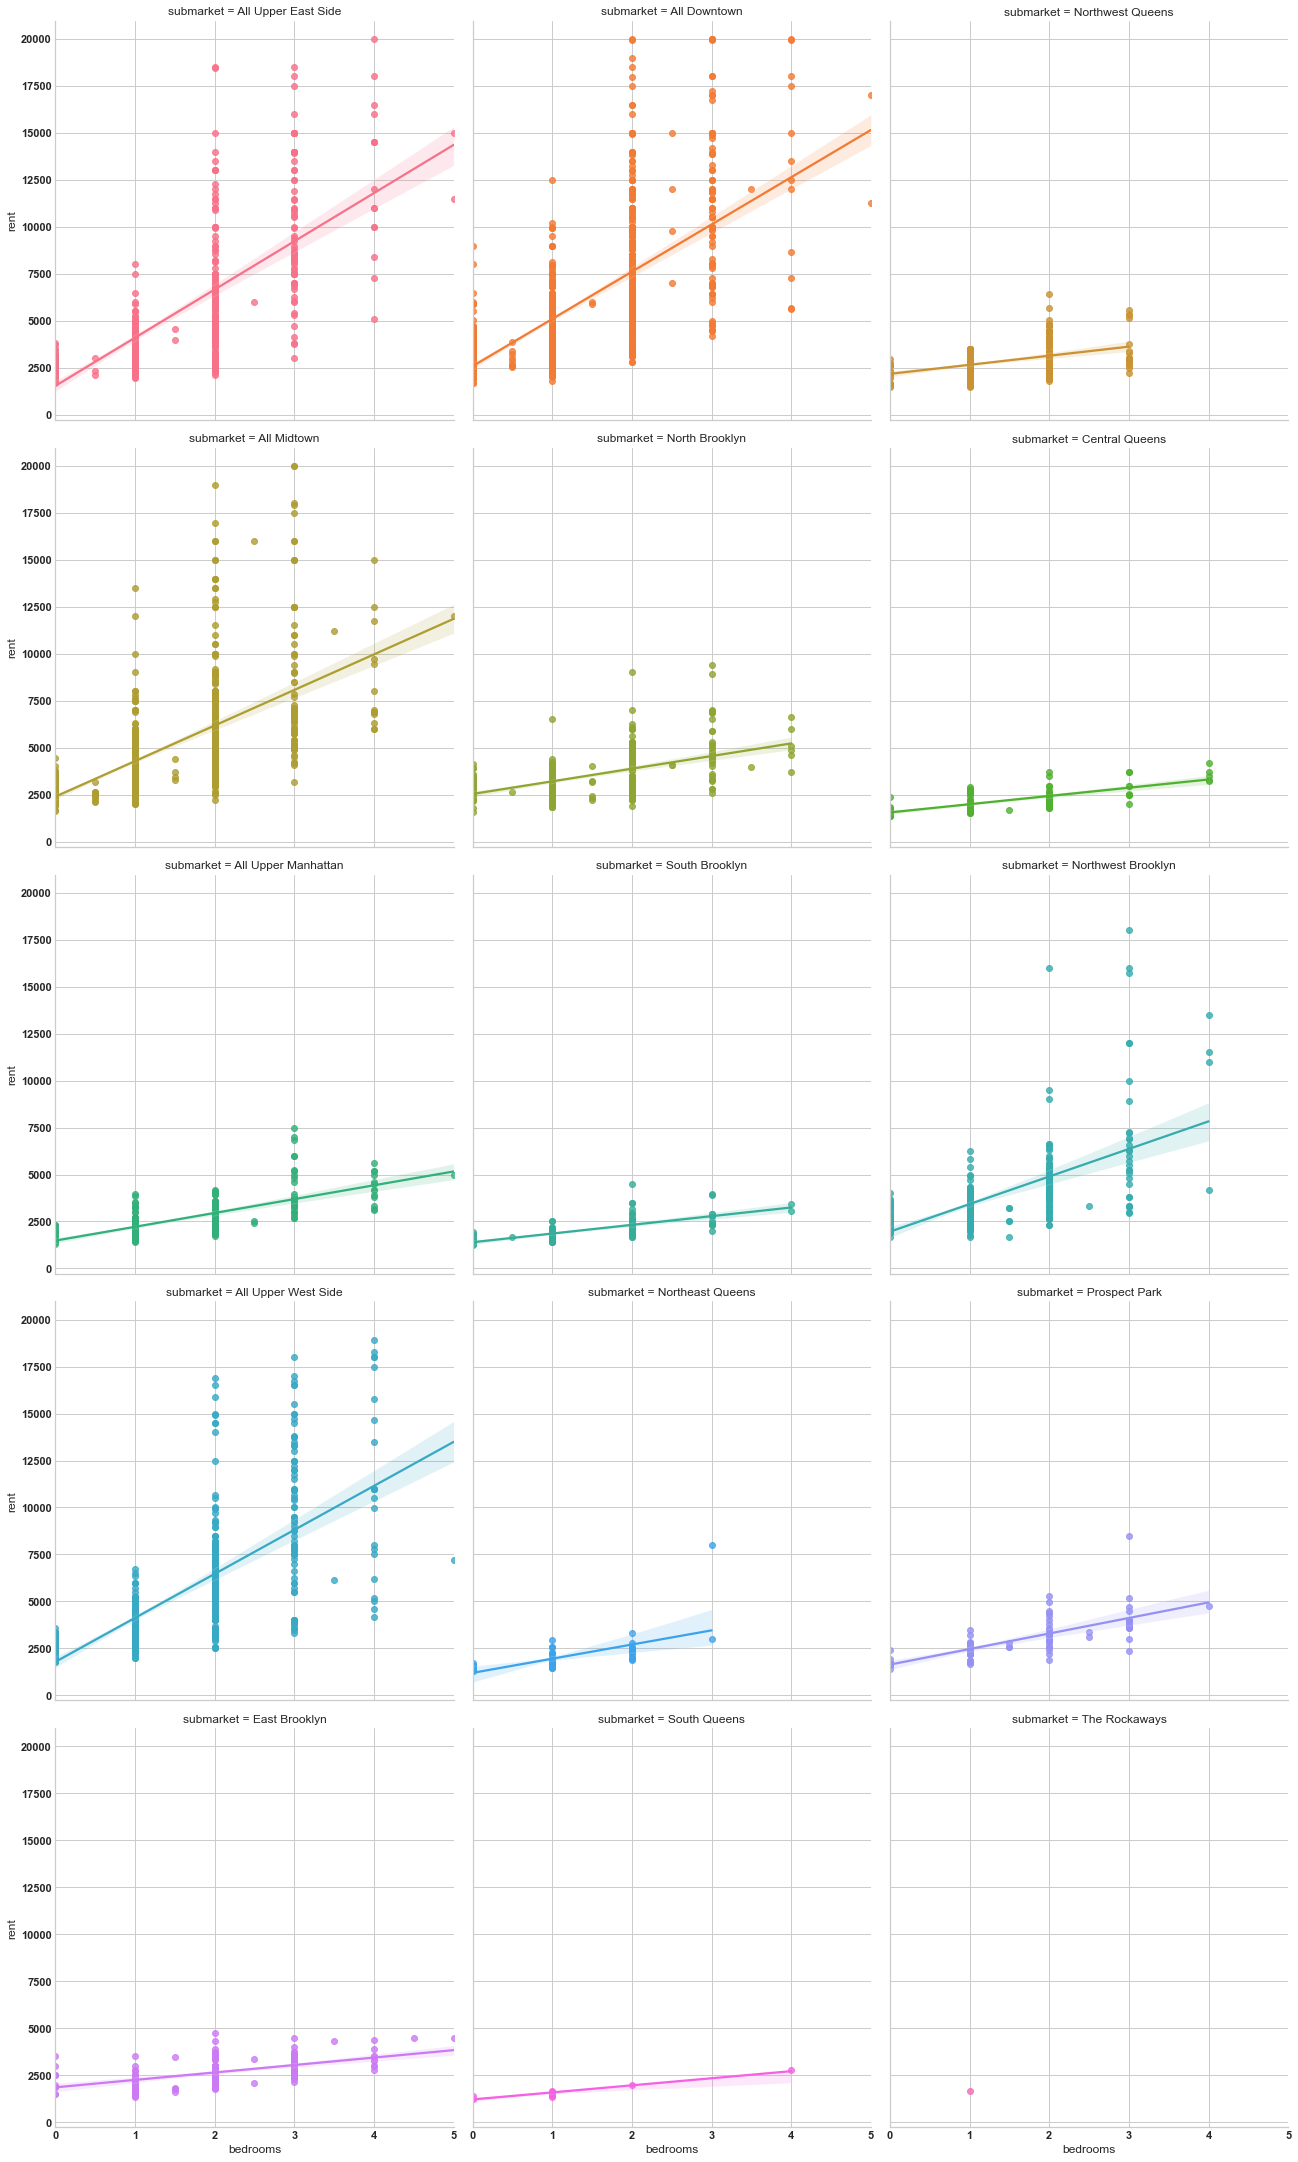

In [267]:
sns.set_style('whitegrid') 
plot=sns.lmplot(x ='bedrooms', y ='rent', data = rental,col='submarket', hue ='submarket',height=6,col_wrap=3) 

## Bedroom and Bathroom Analysis on Rent 

### Q11: Given a budget, what is the most ideal combination of bedroom and bathroom ?

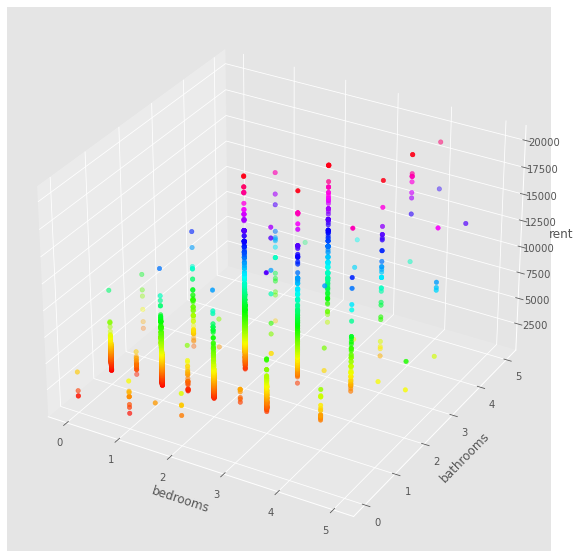

In [11]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection="3d")

z_points = rental['rent']
x_points = rental['bedrooms']
y_points = rental['bathrooms']
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

ax.set_xlabel('bedrooms')
ax.set_ylabel('bathrooms')
ax.set_zlabel('rent')

plt.show()

## Location Analysis on Rent

### Q12: Geographically speaking, which area has the cheapest or most expensive apartments ?

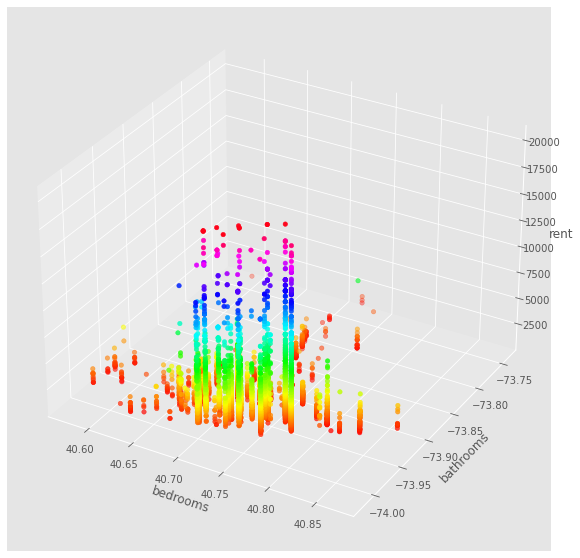

In [12]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection="3d")

z_points = rentalnew['rent']
x_points = rentalnew['latitude']
y_points = rentalnew['longitude']
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

ax.set_xlabel('bedrooms')
ax.set_ylabel('bathrooms')
ax.set_zlabel('rent')

plt.show()

# Availability and Mean Analysis - Create Dataset 'df'

In [17]:
df = pd.DataFrame(columns=['latitude','longitude','neighborhood'])

In [18]:
df['neighborhood']=rentalnew['neighborhood'].unique()

In [19]:
df['latitude']=rentalnew['latitude'].unique()

In [20]:
df['longitude']=rentalnew['longitude'].unique()

In [275]:
d1=rentalnew['neighborhood'].value_counts().to_frame().reset_index().rename(columns={'index':'id', 'neighborhood':'num'})

In [276]:
d2=rentalnew.groupby('neighborhood')['rent'].sum().to_frame().reset_index().rename(columns={'neighborhood':'id','rent':'rent'})

In [277]:
d3=rentalnew.groupby('neighborhood')['size_sqft'].sum().to_frame().reset_index().rename(columns={'neighborhood':'id','size_sqft':'size_sqft'})

In [278]:
d4=rentalnew.groupby('neighborhood')['building_age_yrs'].sum().to_frame().reset_index().rename(columns={'neighborhood':'id','building_age_yrs':'building_age_yrs'})

In [26]:
me=reduce(lambda x,y: pd.merge(x,y, on='id', how='outer'), [d1, d2, d3, d4])

In [27]:
df=pd.merge(df, me, left_on='neighborhood', right_on='id')

In [29]:
df['averagerent']=df['rent']/df['num']

In [30]:
df['averagesize']=df['size_sqft']/df['num']

In [31]:
df['averageage']=df['building_age_yrs']/df['num']

In [32]:
df=df.drop(['id', 'rent', 'size_sqft', 'building_age_yrs'],axis=1)

In [157]:
df.to_csv(r'/Users/stevenli/Desktop/count.csv', index = False)

In [295]:
df=pd.read_csv('/Users/stevenli/Desktop/count.csv')

In [296]:
df

,latitude,longitude,neighborhood,num,averagerent,averagesize,averageage
0,40.773702,-73.964120,Upper East Side,500,5519.004000,1017.698000,51.022000
1,40.731980,-73.996566,Greenwich Village,66,5471.424242,922.075758,84.500000
2,40.772014,-73.930267,Astoria,132,2541.537879,815.356061,41.954545
3,40.760109,-73.978163,Midtown,119,5930.672269,1049.126050,44.983193
4,40.714622,-73.953450,Williamsburg,306,3679.787582,879.493464,42.398693
...,...,...,...,...,...,...,...
88,40.713600,-73.796500,Jamaica Hills,1,1625.000000,865.000000,54.000000
89,40.740446,-73.842811,North Corona,1,2000.000000,722.000000,2.000000
90,40.815778,-73.951554,Manhattanville,1,1395.000000,500.000000,111.000000
91,40.753991,-73.765966,Oakland Gardens,1,2299.000000,850.000000,64.000000


## Average Rent Ranking by Neighborhood

### Q13: Which neighborhood has the highest average rent overall ?

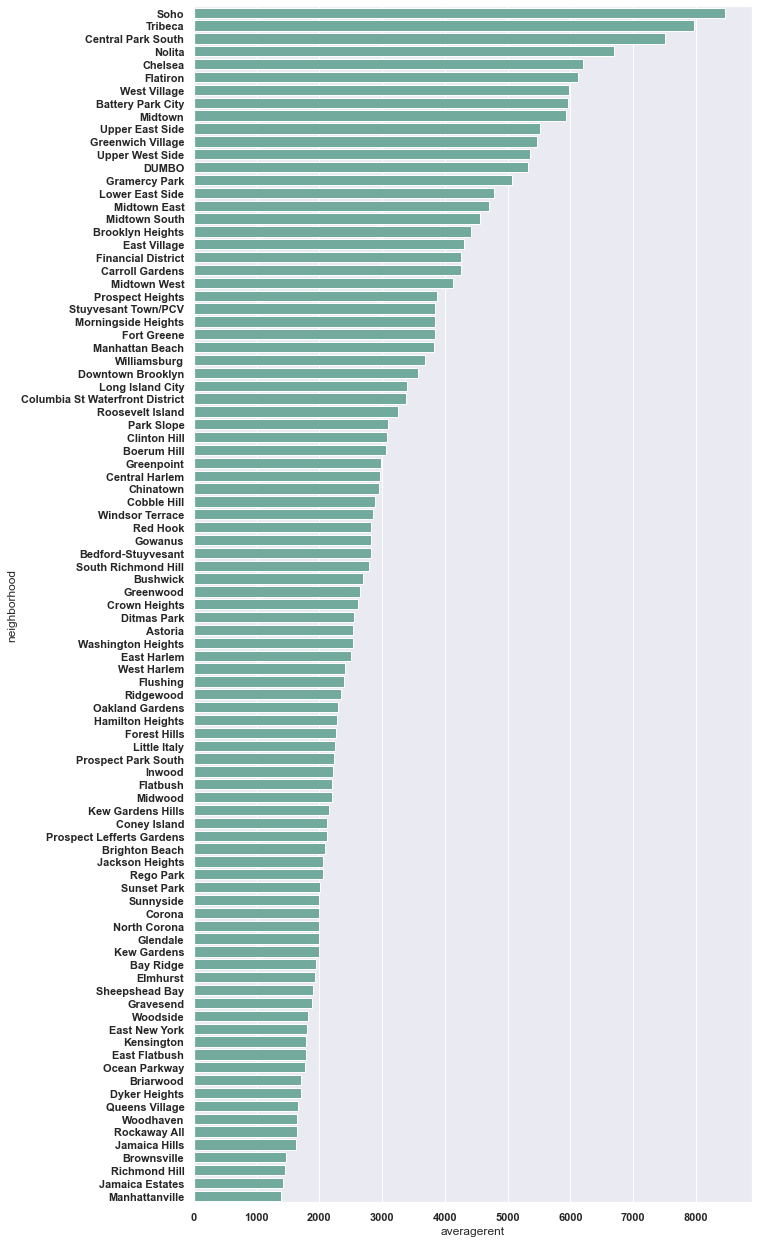

In [192]:
plt.figure(figsize=(10, 22))
df = df.sort_values(['averagerent'], ascending=False).reset_index(drop=True)
sns.barplot(
    x="averagerent", 
    y="neighborhood", 
    data=df, 
    estimator=sum, 
     ci=None,
    color='#69b3a2'
);

## Availability Ranking by Neighborhood

### Q14: Which are the top 5 neighborhoods with the most available apartments ?

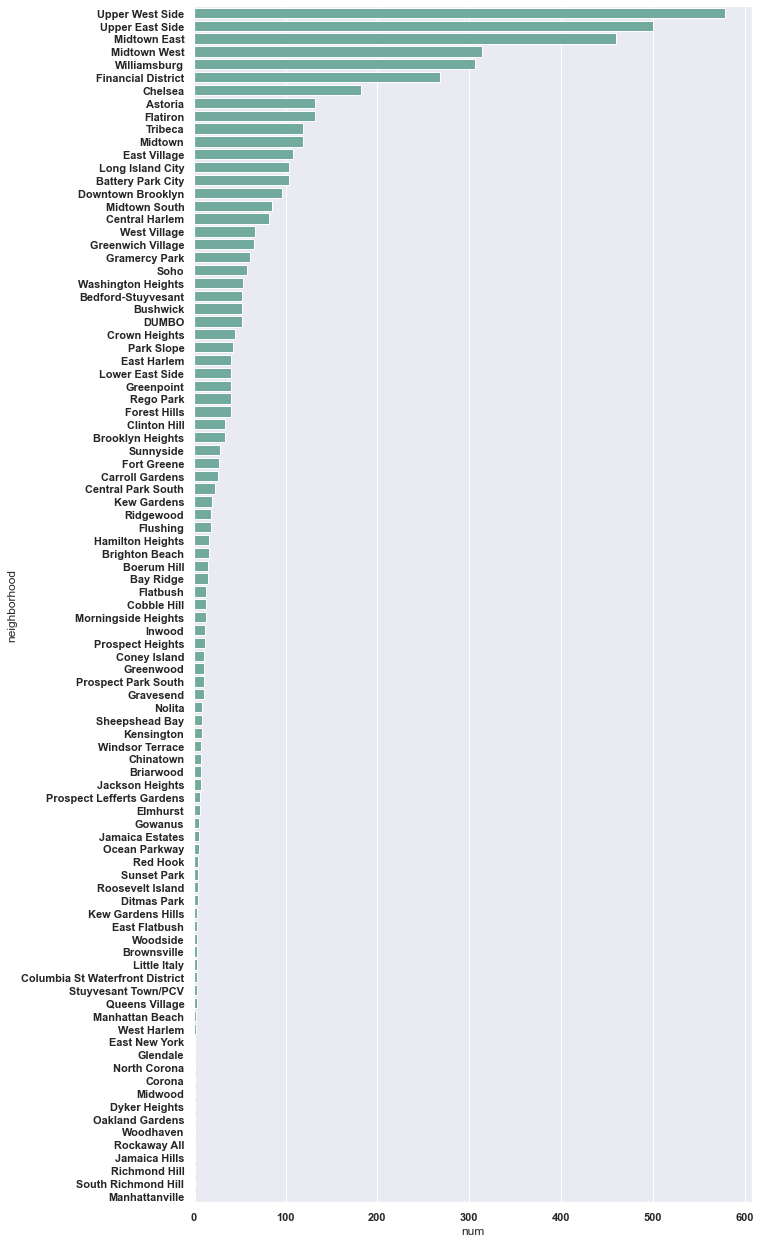

In [193]:
plt.figure(figsize=(10, 22))
df = df.sort_values(['num'], ascending=False).reset_index(drop=True)
sns.barplot(
    x="num", 
    y="neighborhood", 
    data=df, 
    estimator=sum, 
     ci=None,
    color='#69b3a2'
);

## Average Size Ranking by Neighborhood

### Q15: Which neighborhood has the largest apartment overall ?

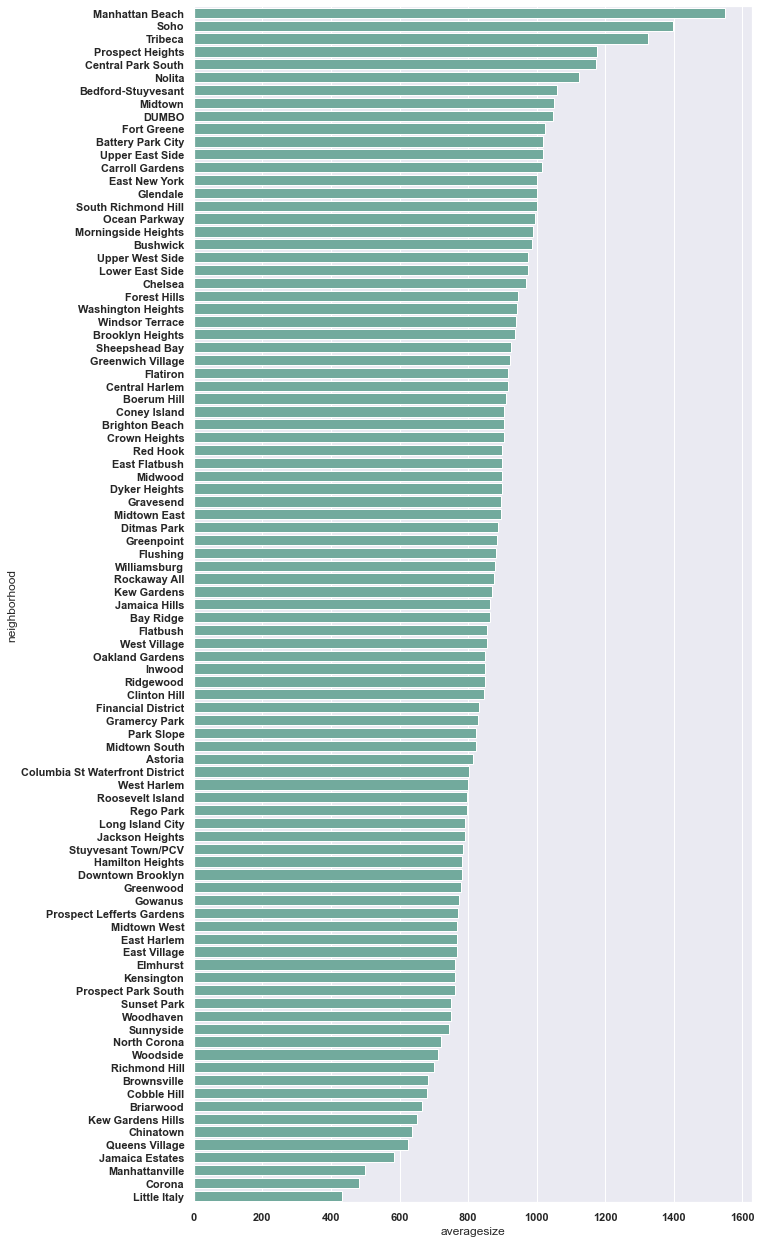

In [195]:
plt.figure(figsize=(10, 22))
df = df.sort_values(['averagesize'], ascending=False).reset_index(drop=True)
sns.barplot(
    x="averagesize", 
    y="neighborhood", 
    data=df, 
    estimator=sum, 
     ci=None,
    color='#69b3a2'
);

## Average Building Age Ranking by Neighborhood

### Q16: Which neighborhood has the newest apartment overall ?

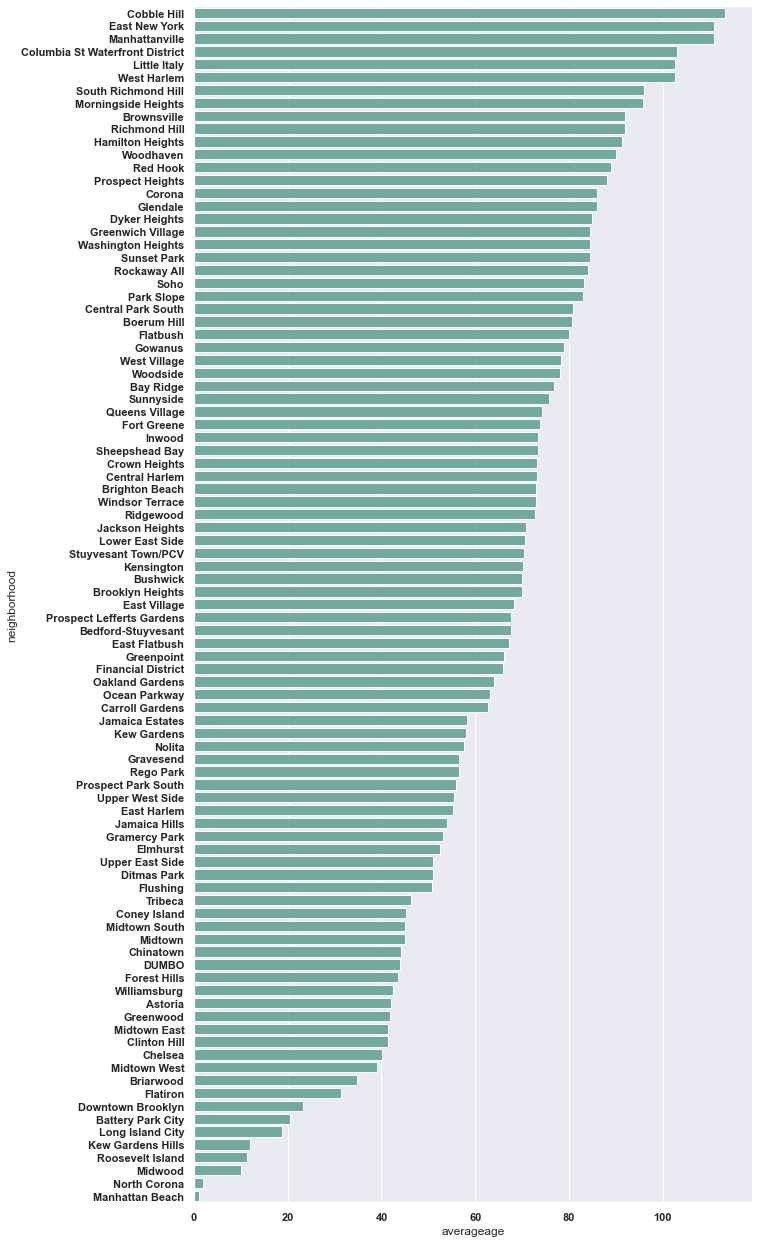

In [196]:
plt.figure(figsize=(10, 22))
df = df.sort_values(['averageage'], ascending=False).reset_index(drop=True)
sns.barplot(
    x="averageage", 
    y="neighborhood", 
    data=df, 
    estimator=sum, 
     ci=None,
    color='#69b3a2'
);

## Neighborhood Location

In [162]:
map = folium.Map([40.7128,-74.0060],zoom_start=11)
folium.plugins.HeatMap(df[['latitude','longitude']].dropna(),
                       radius=8, gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(map)
display(map)

## Neighborhood Distribution on Availability and Rent

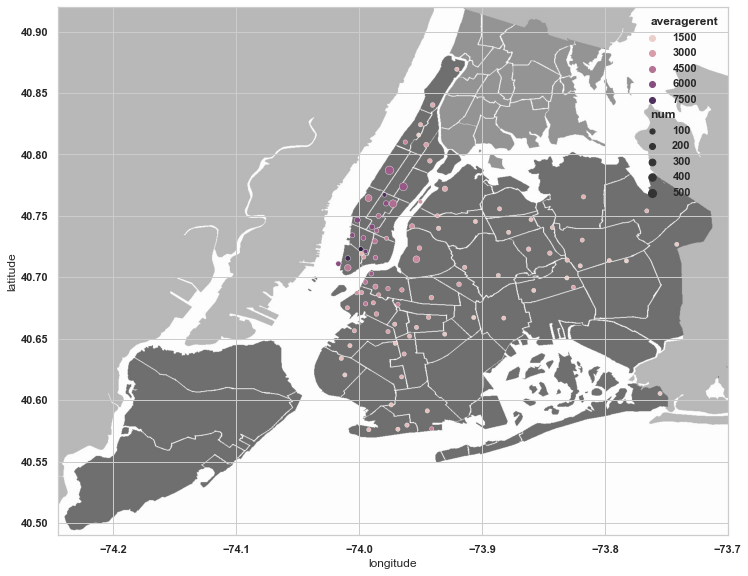

In [297]:
fig, ax = plt.subplots(figsize=(12,12))
img=plt.imread('/Users/stevenli/Desktop/New_York_City_.png', 0)
coordenates_to_extent = [-74.245, -73.7, 40.49, 40.92]
ax.imshow(img, zorder=0, extent=coordenates_to_extent)

scatter_map = sns.scatterplot(x='longitude', y='latitude', hue='averagerent', size="num",s=50,ax=ax, data=df)
ax.grid(True)
plt.show()

# Generate Location Data - Create Dataset 'rentalnew'

In [4]:
locator = Nominatim(user_agent='myGeocoder')

In [6]:
location = locator.geocode('Astoria, New York')
location

Location(Astoria, Queens, Queens County, New York, 11102, United States, (40.7720145, -73.9302673, 0.0))

In [7]:
rental['address'] = rental[['neighborhood', 'borough']].agg(', '.join, axis=1)

In [10]:
# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
# 2- - create location column
rental['location'] = rental['address'].apply(geocode)
# 3 - create longitude and latitude from location column (returns tuple)
rental['point'] = rental['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude and longitude columns
rental[['latitude', 'longitude', 'altitude']] = pd.DataFrame(rental['point'].tolist(), index=rental.index)

In [13]:
rental=rental.drop(['location', 'point', 'address', 'altitude'], axis=1)
rental.head()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,...,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough,latitude,longitude
0,1545,44518357,2550,0.0,1,480,9,2.0,17,1,...,0,1,1,0,1,Upper East Side,All Upper East Side,Manhattan,40.773702,-73.964120
1,2472,94441623,11500,2.0,2,2000,4,1.0,96,0,...,0,0,0,0,0,Greenwich Village,All Downtown,Manhattan,40.731980,-73.996566
2,10234,87632265,3000,3.0,1,1000,4,1.0,106,0,...,0,0,0,0,0,Astoria,Northwest Queens,Queens,40.772014,-73.930267
3,2919,76909719,4500,1.0,1,916,2,51.0,29,0,...,1,1,1,0,0,Midtown,All Midtown,Manhattan,40.760109,-73.978163
4,2790,92953520,4795,1.0,1,975,3,8.0,31,0,...,1,1,1,0,1,Greenwich Village,All Downtown,Manhattan,40.731980,-73.996566


In [19]:
rental.isnull().sum()

rental_id            0
building_id          0
rent                 0
bedrooms             0
bathrooms            0
size_sqft            0
min_to_subway        0
floor                0
building_age_yrs     0
no_fee               0
has_roofdeck         0
has_washer_dryer     0
has_doorman          0
has_elevator         0
has_dishwasher       0
has_patio            0
has_gym              0
neighborhood         0
submarket            0
borough              0
latitude            10
longitude           10
dtype: int64

In [20]:
rental[rental.isnull().any(axis=1)]

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,...,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough,latitude,longitude
256,9903,27285599,3631,1.0,1,707,3,1.0,71,1,...,0,0,0,0,0,Stuyvesant Town/PCV,All Downtown,Manhattan,NaN,NaN
803,5789,59003976,1750,1.0,1,500,2,3.0,85,0,...,0,0,0,0,0,Prospect Lefferts Gardens,Prospect Park,Brooklyn,NaN,NaN
1238,6421,97925272,4100,1.0,1,944,8,13.0,69,1,...,1,1,0,0,0,Stuyvesant Town/PCV,All Downtown,Manhattan,NaN,NaN
1255,10672,98559289,1600,0.0,1,500,6,10.0,54,0,...,0,0,0,0,0,Prospect Lefferts Gardens,Prospect Park,Brooklyn,NaN,NaN
1743,4025,27285599,3810,1.0,1,708,3,11.0,71,1,...,0,1,1,0,1,Stuyvesant Town/PCV,All Downtown,Manhattan,NaN,NaN
1774,9484,78969040,1900,1.0,1,800,3,4.0,85,0,...,0,0,0,0,0,Prospect Lefferts Gardens,Prospect Park,Brooklyn,NaN,NaN
2418,4773,59003976,3000,3.0,1,900,2,1.0,85,1,...,0,0,0,0,0,Prospect Lefferts Gardens,Prospect Park,Brooklyn,NaN,NaN
2995,10900,70382431,2350,3.0,1,1200,3,2.0,111,0,...,0,0,0,0,0,Prospect Lefferts Gardens,Prospect Park,Brooklyn,NaN,NaN
3242,9637,44656353,2350,1.0,1,800,3,4.0,0,1,...,0,0,0,0,0,Prospect Lefferts Gardens,Prospect Park,Brooklyn,NaN,NaN
4833,6699,79776751,1850,1.0,1,700,7,7.0,54,0,...,0,0,0,0,0,Prospect Lefferts Gardens,Prospect Park,Brooklyn,NaN,NaN


In [21]:
rental.loc[(rental['neighborhood']=='Stuyvesant Town/PCV'),'latitude'] = 40.7317

In [35]:
rental.loc[(rental['neighborhood']=='Stuyvesant Town/PCV'),'longitude'] = -73.9778

In [26]:
rental.loc[(rental['neighborhood']=='Prospect Lefferts Gardens'),'latitude'] = 40.6592

In [36]:
rental.loc[(rental['neighborhood']=='Prospect Lefferts Gardens'),'longitude'] = -73.9534

In [29]:
rental.head()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,...,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough,latitude,longitude,latitudee
0,1545,44518357,2550,0.0,1,480,9,2.0,17,1,...,1,1,0,1,Upper East Side,All Upper East Side,Manhattan,40.773702,-73.964120,NaN
1,2472,94441623,11500,2.0,2,2000,4,1.0,96,0,...,0,0,0,0,Greenwich Village,All Downtown,Manhattan,40.731980,-73.996566,NaN
2,10234,87632265,3000,3.0,1,1000,4,1.0,106,0,...,0,0,0,0,Astoria,Northwest Queens,Queens,40.772014,-73.930267,NaN
3,2919,76909719,4500,1.0,1,916,2,51.0,29,0,...,1,1,0,0,Midtown,All Midtown,Manhattan,40.760109,-73.978163,NaN
4,2790,92953520,4795,1.0,1,975,3,8.0,31,0,...,1,1,0,1,Greenwich Village,All Downtown,Manhattan,40.731980,-73.996566,NaN


/Users/stevenli/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'latitude')

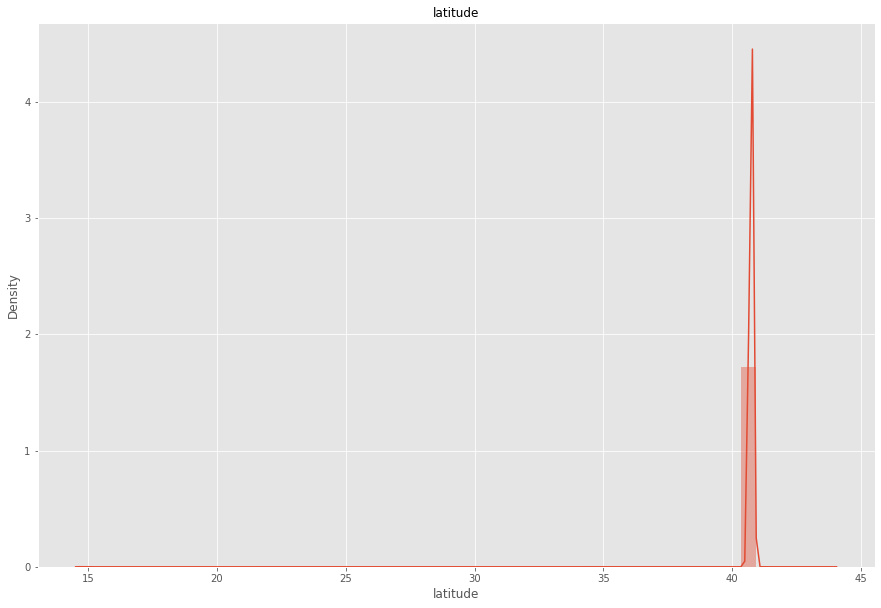

In [39]:
plt.figure(figsize=(15,10))
ax = sns.distplot(rental['latitude'], kde=True)
ax.set_title('latitude', fontsize=12)

/Users/stevenli/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'longitude')

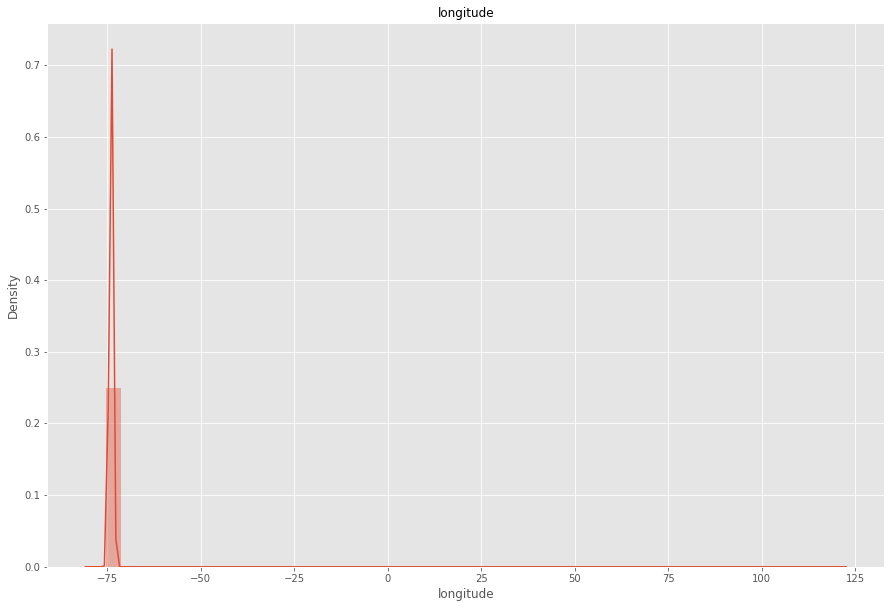

In [40]:
plt.figure(figsize=(15,10))
ax = sns.distplot(rental['longitude'], kde=True)
ax.set_title('longitude', fontsize=12)

In [41]:
#remove outlier
rental.iloc[rental['latitude'].idxmax()]

rental_id                          2533
building_id                    40179056
rent                               2795
bedrooms                              4
bathrooms                             2
size_sqft                          1000
min_to_subway                        11
floor                                 2
building_age_yrs                     96
no_fee                                0
has_roofdeck                          0
has_washer_dryer                      0
has_doorman                           0
has_elevator                          0
has_dishwasher                        0
has_patio                             0
has_gym                               0
neighborhood        South Richmond Hill
submarket                  South Queens
borough                          Queens
latitude                        43.8474
longitude                      -79.4058
Name: 2982, dtype: object

In [42]:
rental.iloc[rental['longitude'].idxmax()]

rental_id                    6478
building_id              55805738
rent                         1625
bedrooms                        1
bathrooms                       1
size_sqft                     865
min_to_subway                   5
floor                           5
building_age_yrs               54
no_fee                          0
has_roofdeck                    0
has_washer_dryer                0
has_doorman                     0
has_elevator                    0
has_dishwasher                  0
has_patio                       0
has_gym                         0
neighborhood        Jamaica Hills
submarket            South Queens
borough                    Queens
latitude                  14.7159
longitude                 121.043
Name: 3380, dtype: object

In [43]:
rental.loc[(rental['neighborhood']=='South Richmond Hill'),'latitude'] = 40.6919

In [44]:
rental.loc[(rental['neighborhood']=='South Richmond Hill'),'longitude'] = -73.8257

In [45]:
rental.loc[(rental['neighborhood']=='Jamaica Hills'),'latitude'] = 40.7136

In [46]:
rental.loc[(rental['neighborhood']=='Jamaica Hills'),'longitude'] = -73.7965

In [56]:
rental.to_csv(r'/Users/stevenli/Desktop/rentalnew.csv', index = False)

In [23]:
rentalnew=pd.read_csv('/Users/stevenli/Desktop/rentalnew.csv')

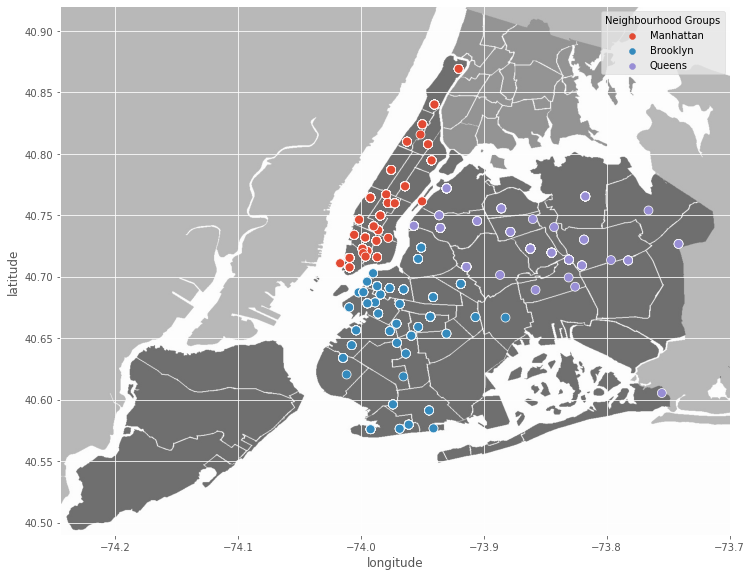

In [36]:
fig, ax = plt.subplots(figsize=(12,12))

# Show Background image
img=plt.imread('/Users/stevenli/Desktop/New_York_City_.png', 0)
coordenates_to_extent = [-74.245, -73.7, 40.49, 40.92]
ax.imshow(img, zorder=0, extent=coordenates_to_extent)


# Plotting
scatter_map = sns.scatterplot(x='longitude', y='latitude', hue='borough',s=80, ax=ax, data=rentalnew)
ax.grid(True)
plt.legend(title='Neighbourhood Groups')
plt.show()

### End